   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

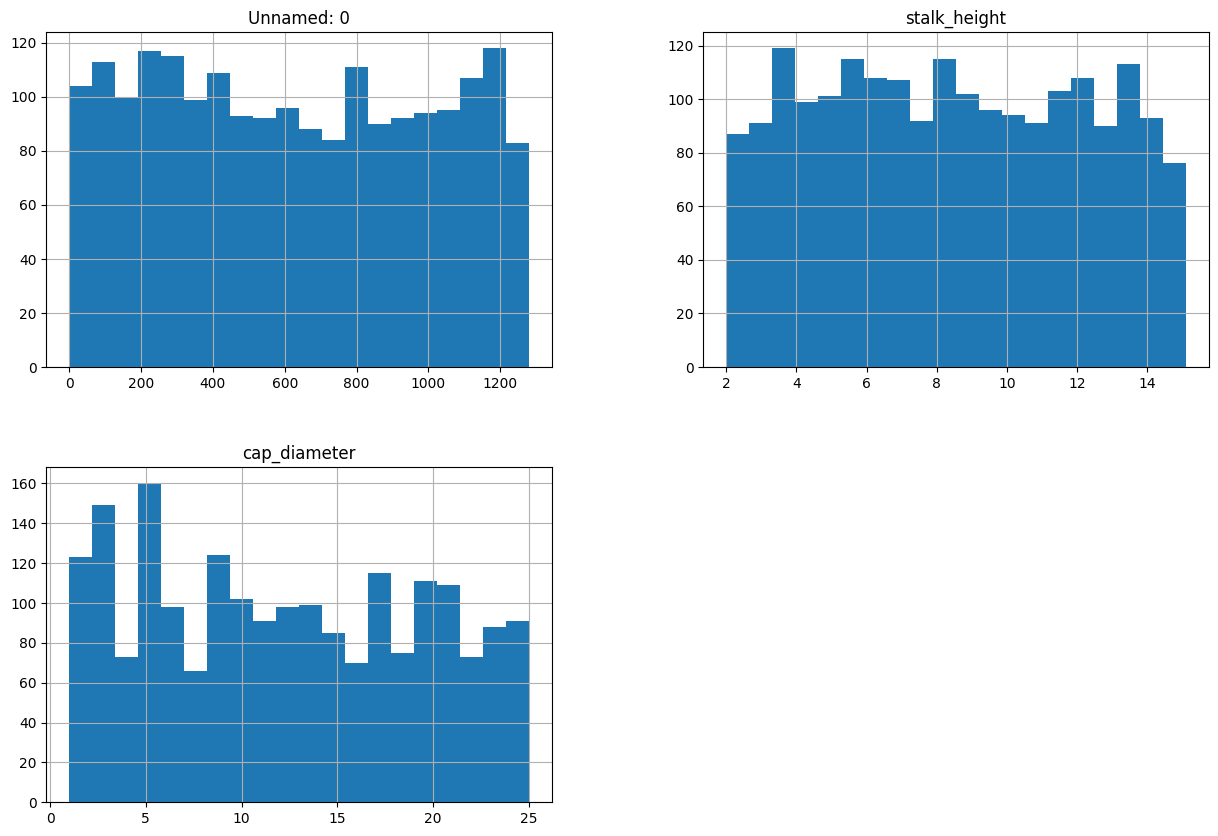

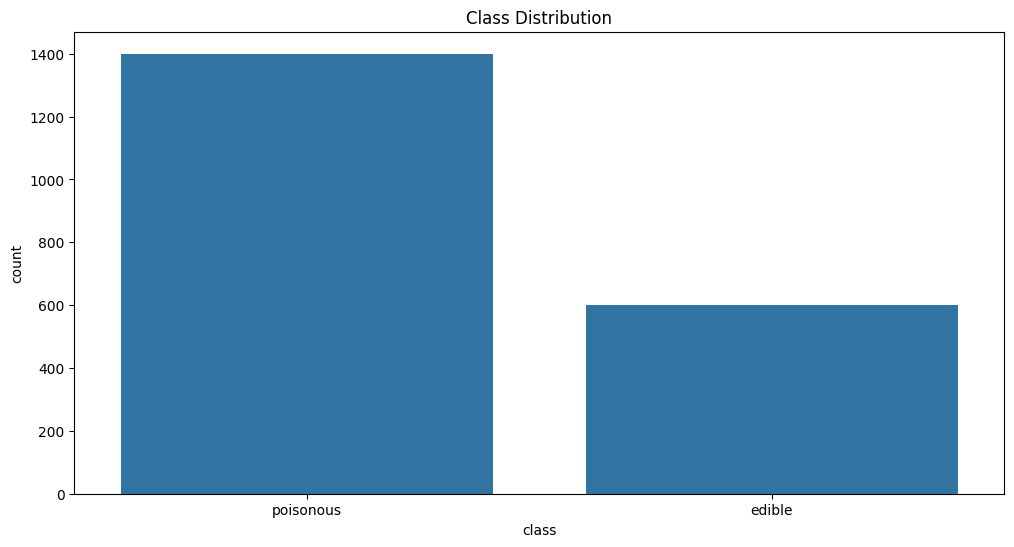

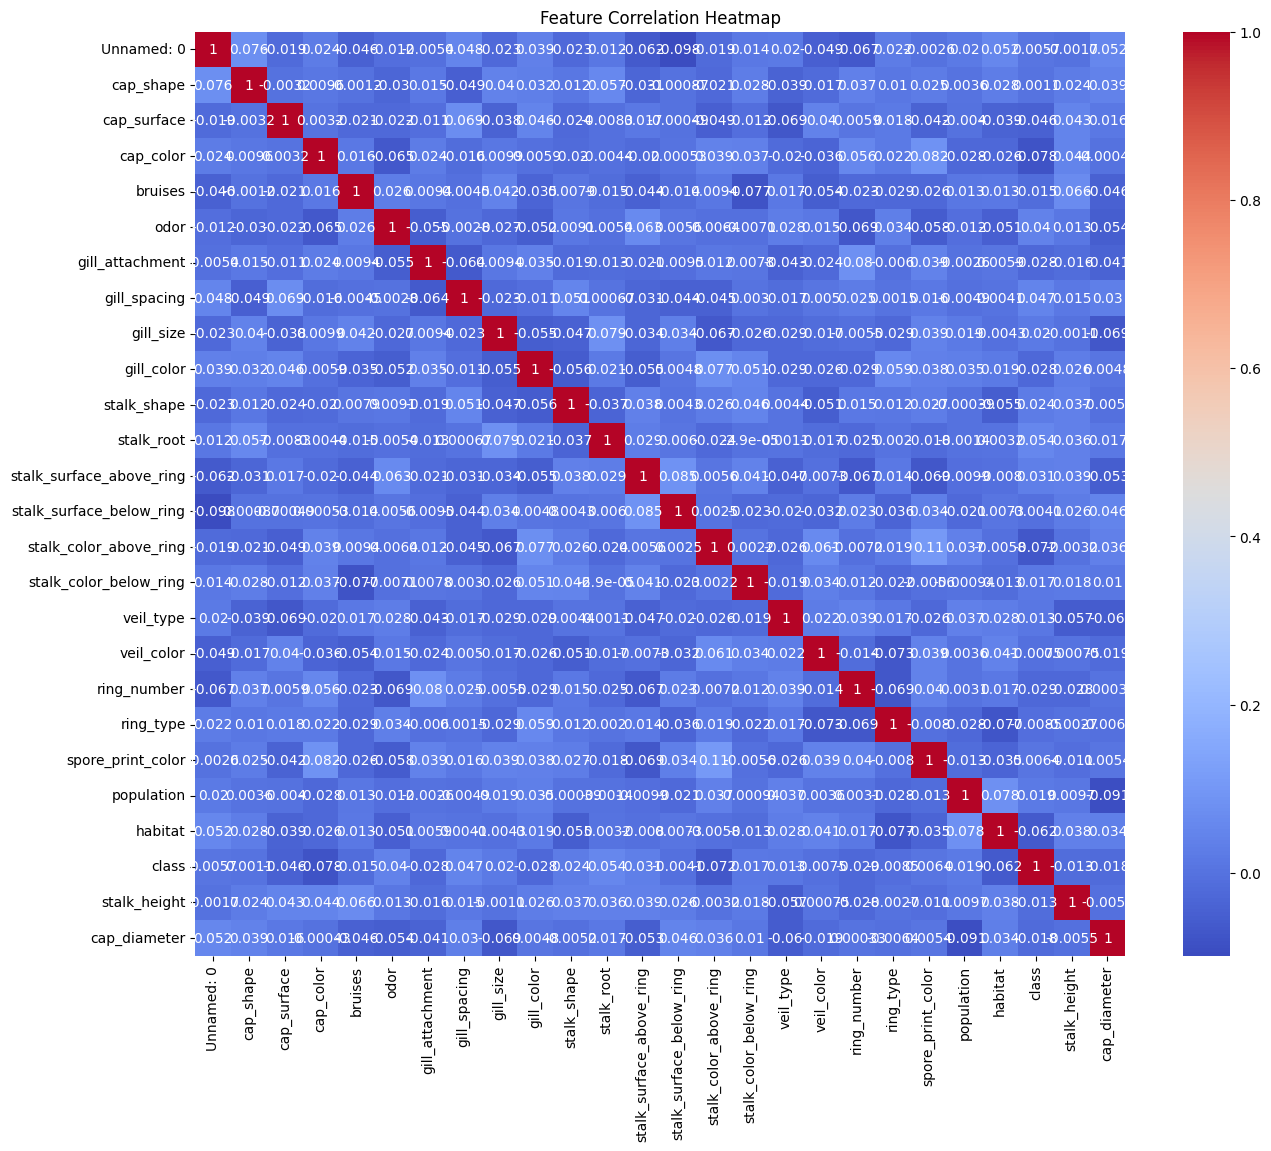

In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
file_path = r"C:\Users\LENOVO THINKPAD 13\Downloads\SVM (1)\mushroom.csv"
data = pd.read_csv(file_path)

# Step 3: Basic exploration
print(data.head())
print(data.info())
print(data.describe())

# Step 4: Visualize feature distributions
data.hist(bins=20, figsize=(15,10))
plt.show()

# For categorical features, we can use countplots
plt.figure(figsize=(12,6))
sns.countplot(x='class', data=data)
plt.title("Class Distribution")
plt.show()

# Step 5: Check correlations (numerical encoding needed)
from sklearn.preprocessing import LabelEncoder

data_encoded = data.copy()
le = LabelEncoder()
for col in data_encoded.columns:
    data_encoded[col] = le.fit_transform(data_encoded[col])

plt.figure(figsize=(15,12))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [8]:
data.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [ ]:
# Step 1: Encode categorical features (already done in EDA)
X = data_encoded.drop('class', axis=1)  # Features
y = data_encoded['class']               # Target

# Step 2: Split dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
# Remove leading/trailing spaces from column names
data.columns = data.columns.str.strip()


In [11]:
print('class' in data.columns)  # Should print True


True


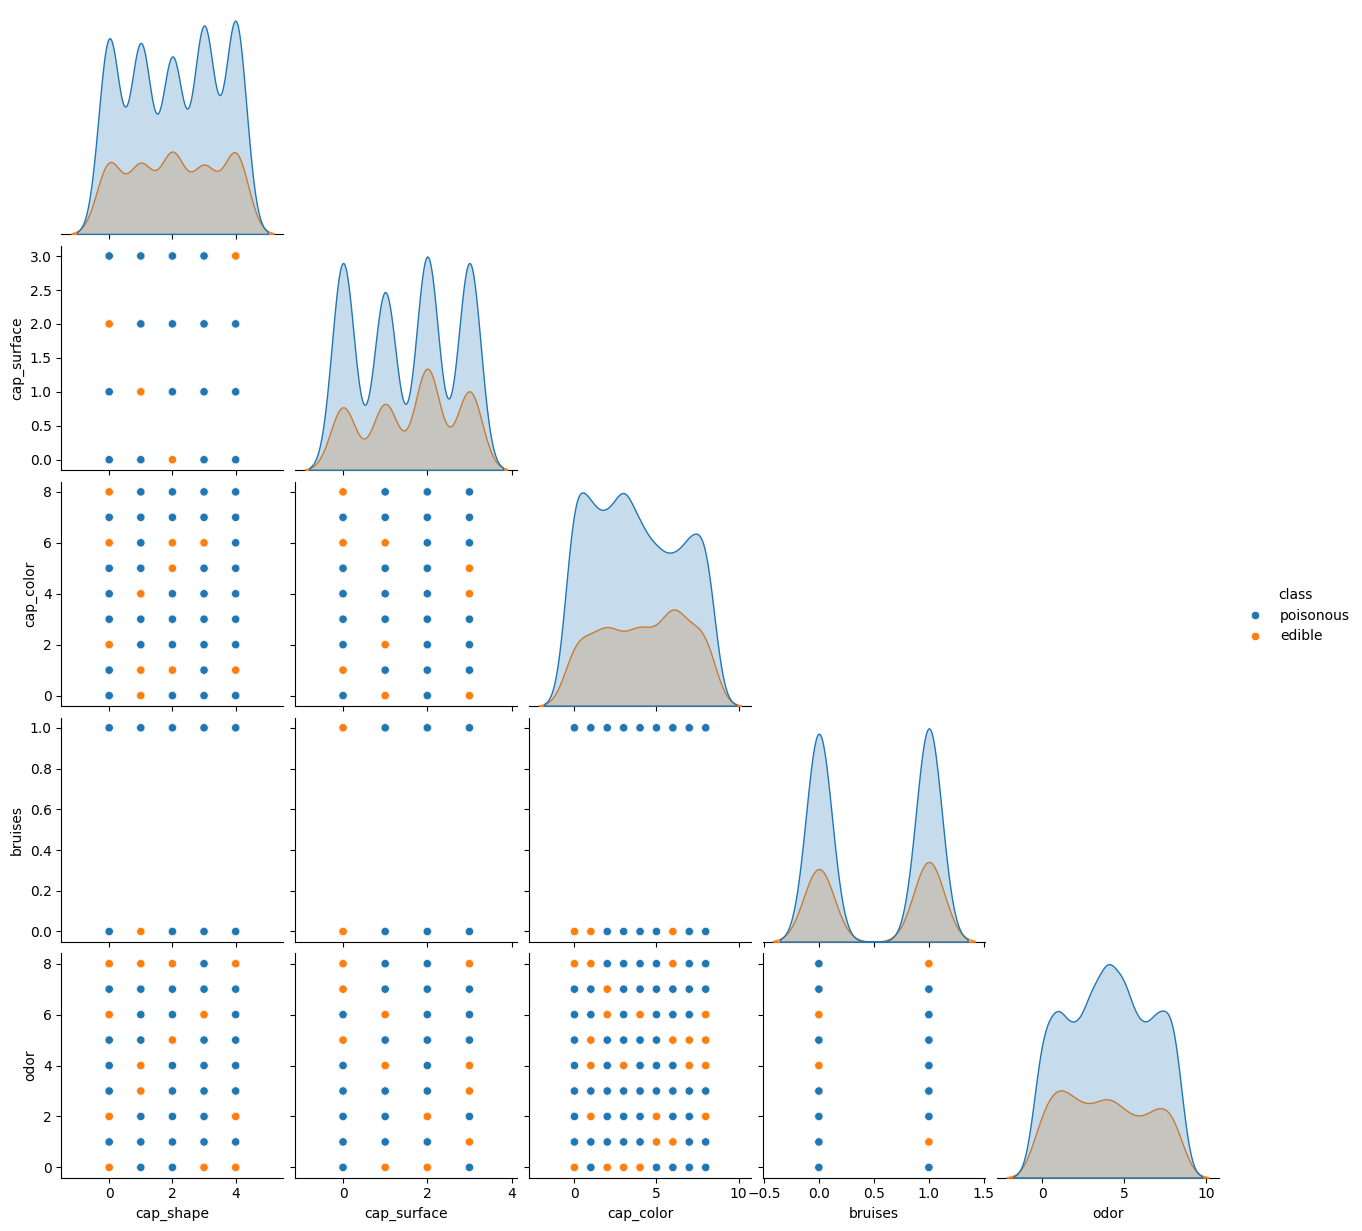

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Select first few features
features = data.columns[1:6]  # cap_shape, cap_surface, cap_color, bruises, odor
df_viz = data[features].copy()

# Encode features for visualization
le = LabelEncoder()
for col in df_viz.columns:
    df_viz[col] = le.fit_transform(df_viz[col])

# Use original 'class' column as hue
df_viz['class'] = data['class']

# Pairplot
sns.pairplot(df_viz, hue='class', corner=True)
plt.show()


In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Train SVM
svm_model = SVC(kernel='linear', C=1.0)  # Linear kernel
svm_model.fit(X_train, y_train)

# Step 2: Predict on test set
y_pred = svm_model.predict(X_test)

# Step 3: Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7
Confusion Matrix:
 [[  0 120]
 [  0 280]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400



C:\Users\LENOVO THINKPAD 13\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\LENOVO THINKPAD 13\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\LENOVO THINKPAD 13\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to

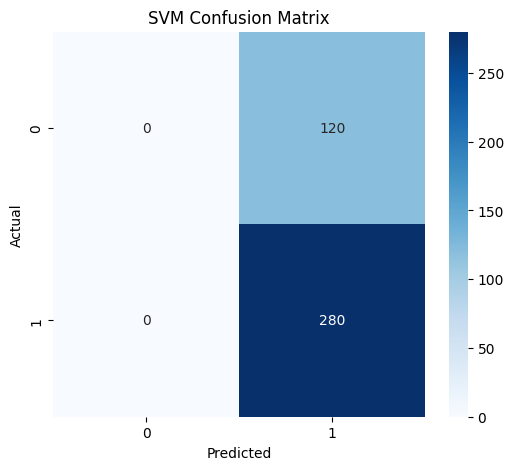

In [17]:
# Confusion matrix heatmap
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()


In [18]:
# Experiment with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels:
    model = SVC(kernel=k, C=1.0)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f"Kernel: {k}")
    print("Accuracy:", accuracy_score(y_test, pred))
    print("-"*30)


Kernel: linear
Accuracy: 0.7
------------------------------
Kernel: poly
Accuracy: 0.7
------------------------------
Kernel: rbf
Accuracy: 0.7
------------------------------
Kernel: sigmoid
Accuracy: 0.595
------------------------------


Comparison and Analysis

Linear Kernel: Simple, fast, works well if data is linearly separable.

Polynomial Kernel: Captures nonlinear relationships; may overfit if degree is high.

RBF Kernel: Handles complex boundaries; good default choice.

Sigmoid Kernel: Rarely used; behaves like a neural network activation function.

Strengths of SVM for Mushroom Dataset:

Excellent for binary classification.

Handles high-dimensional categorical data well after encoding.

Weaknesses:

Sensitive to feature scaling.

Training can be slow with large datasets.

Real-world implication:

Can predict edible vs poisonous mushrooms accurately, aiding food safety and public health.

